In [1]:
import numpy as np
import pandas as pd
import scipy.sparse as sp
import scipy.io as spio

import matplotlib.pyplot as plt
import matplotlib.cm as cm
from matplotlib.ticker import FormatStrFormatter

from sklearn.metrics import roc_curve, roc_auc_score
from scipy.stats import pearsonr

from scipy.stats import norm

import isolearn.io as isoio

from analyze_leslie_apadb_celltypes_helpers import *


In [2]:
#Load Leslie/APADB data
leslie_tissue_index = np.array(['hek293', 'mcf10a_hras2', 'mcf10a1', 'mcf10a2', 'mcf10a_hras1', 'bcells1', 'mcf7', 'bcells2', 'ovary', 'breast', 'brain', 'skmuscle', 'blcl', 'hES', 'testis', 'hela', 'ntera'], dtype=np.object)
apadb_tissue_index = np.array(['kidney', 'pancreas', 'monocytes', 'all', 'pdac', 'prcc', 'full_blood', 'hlf'], dtype=np.object)

#Load PAS dataframe and cut matrix
native_dict = isoio.load('../data/prepared_data/apa_leslie_apadb_data/apa_leslie_apadb_data')

#Load predictions
model_name = 'aparent_theano_legacy_30_31_34_pasaligned_padded'
pred_dict = isoio.load('predictions/apa_leslie_apadb_data/' + model_name + '_predictions')

#Join measurements with predictions
df, leslie_isoform_count, apadb_isoform_count, leslie_cleavage_count_dict, leslie_cleavage_prob_dict, pred_cleavage_prob = join_pas_dataframes(native_dict, pred_dict, leslie_tissue_index, apadb_tissue_index)

#Load Leslie/APADB pairwise APA dataframe
pair_dict = isoio.load('../data/prepared_data/apa_leslie_apadb_pair_data/apa_leslie_apadb_pair_data')

#Load predictions
model_name = 'aparent_apadb_fitted_legacy_pasaligned_padded'
pair_pred_dict = isoio.load('predictions/apa_leslie_apadb_pair_data/' + model_name + '_predictions')

#Join measurements with predictions
pair_df, leslie_cleavage_count_prox_dict, leslie_cleavage_prob_prox_dict, leslie_cleavage_count_dist_dict, leslie_cleavage_prob_dist_dict, pred_cleavage_prob_prox, pred_cleavage_prob_dist = join_apa_dataframes(pair_dict, pair_pred_dict, leslie_tissue_index, apadb_tissue_index)


APADB pair-wise APA site usage prediction performance (using Pooled-APADB fitted APARENT model).


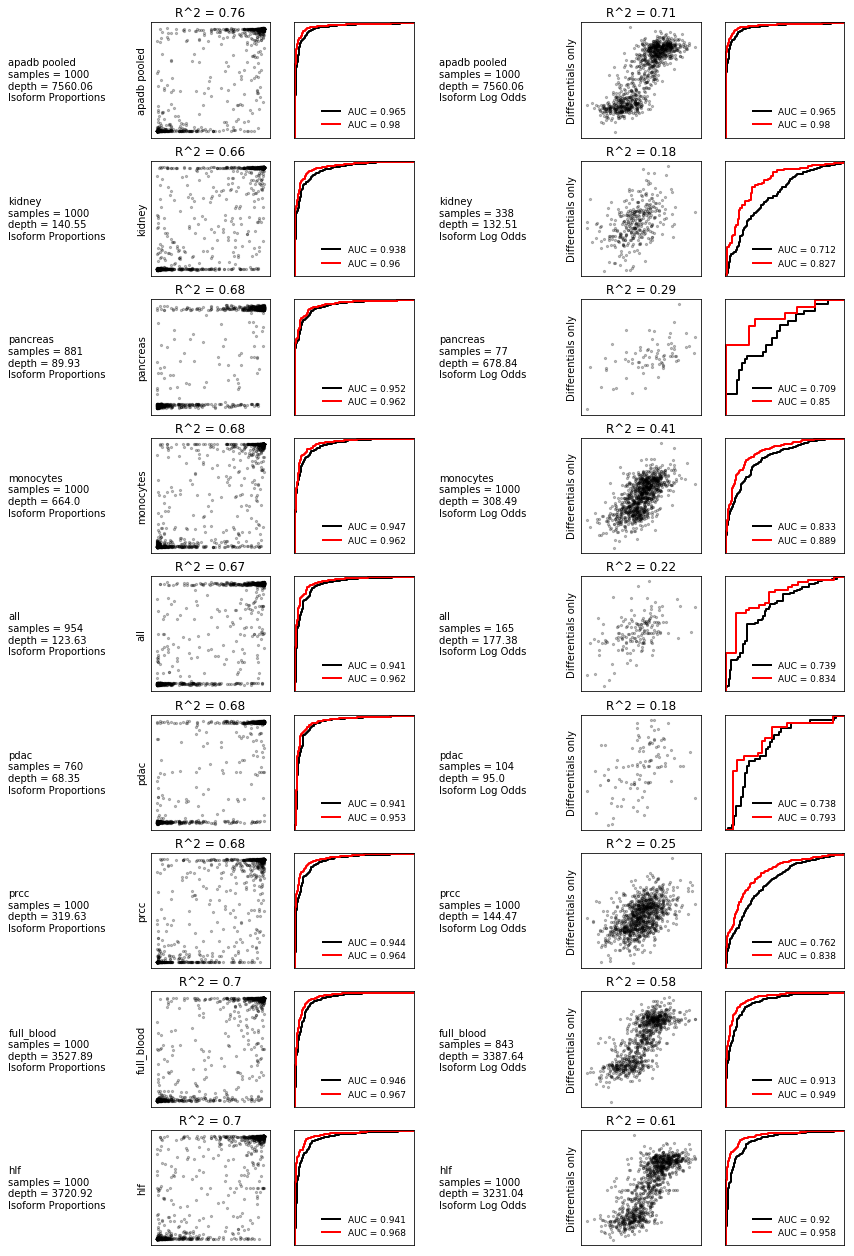

In [3]:
#Multiplex analysis of cell type-specific APA isoform prediction accuracy (APADB)
site_nums = None
site_types = ['UTR3', 'Extension']
pseudo_count = 0.5
max_n_members = 1000

print("APADB pair-wise APA site usage prediction performance (using Pooled-APADB fitted APARENT model).")

[source_data, tissue_index, suffix_index] = ('apadb', ['pooled'] + apadb_tissue_index.tolist(), np.array([''] * (apadb_tissue_index.shape[0] + 1), dtype=np.object))

apadb_r2_tissues, apadb_auc_tissues, apadb_n_samples_tissues, apadb_read_depth_tissues, apadb_rocs = evaluate_predicted_vs_observed_tissues(pair_df, source_data, tissue_index, suffix_index, site_nums, site_types, pseudo_count, max_n_members)


APADB Num APA Sites and Mean Read Depth.


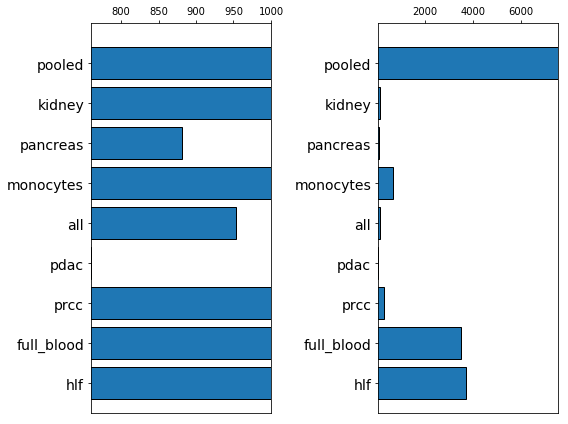

APADB Isoform Usage R^2 and Preferential Usage AUC.


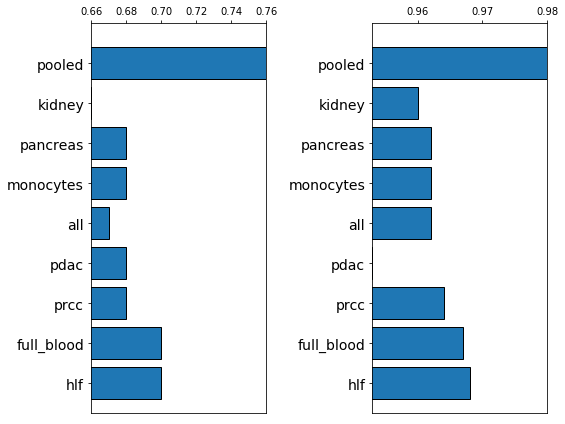

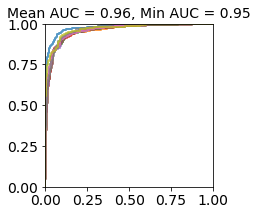

In [4]:
print('APADB Num APA Sites and Mean Read Depth.')

plot_performance_double_bar(tissue_index, apadb_n_samples_tissues, apadb_read_depth_tissues)

print('APADB Isoform Usage R^2 and Preferential Usage AUC.')

plot_performance_double_bar(tissue_index, apadb_r2_tissues, apadb_auc_tissues)

#Plot ROCs
f = plt.figure(figsize=(3, 3))
for tissue_i, tissue in enumerate(tissue_index) :
    fpr, tpr = apadb_rocs[tissue_i]
    plt.plot(fpr, tpr, linewidth=2, alpha=0.75)

min_auc = np.min(apadb_auc_tissues)
mean_auc = np.mean(apadb_auc_tissues)
plt.title('Mean AUC = ' + str(round(mean_auc, 2)) + ', Min AUC = ' + str(round(min_auc, 2)), fontsize=14)

plt.xlim(0, 1)
plt.ylim(0, 1)
plt.xticks([0, 0.25, 0.5, 0.75, 1.0], fontsize=14)
plt.yticks([0, 0.25, 0.5, 0.75, 1.0], fontsize=14)

plt.show()

Leslie pair-wise APA site usage correlation (across cell types).


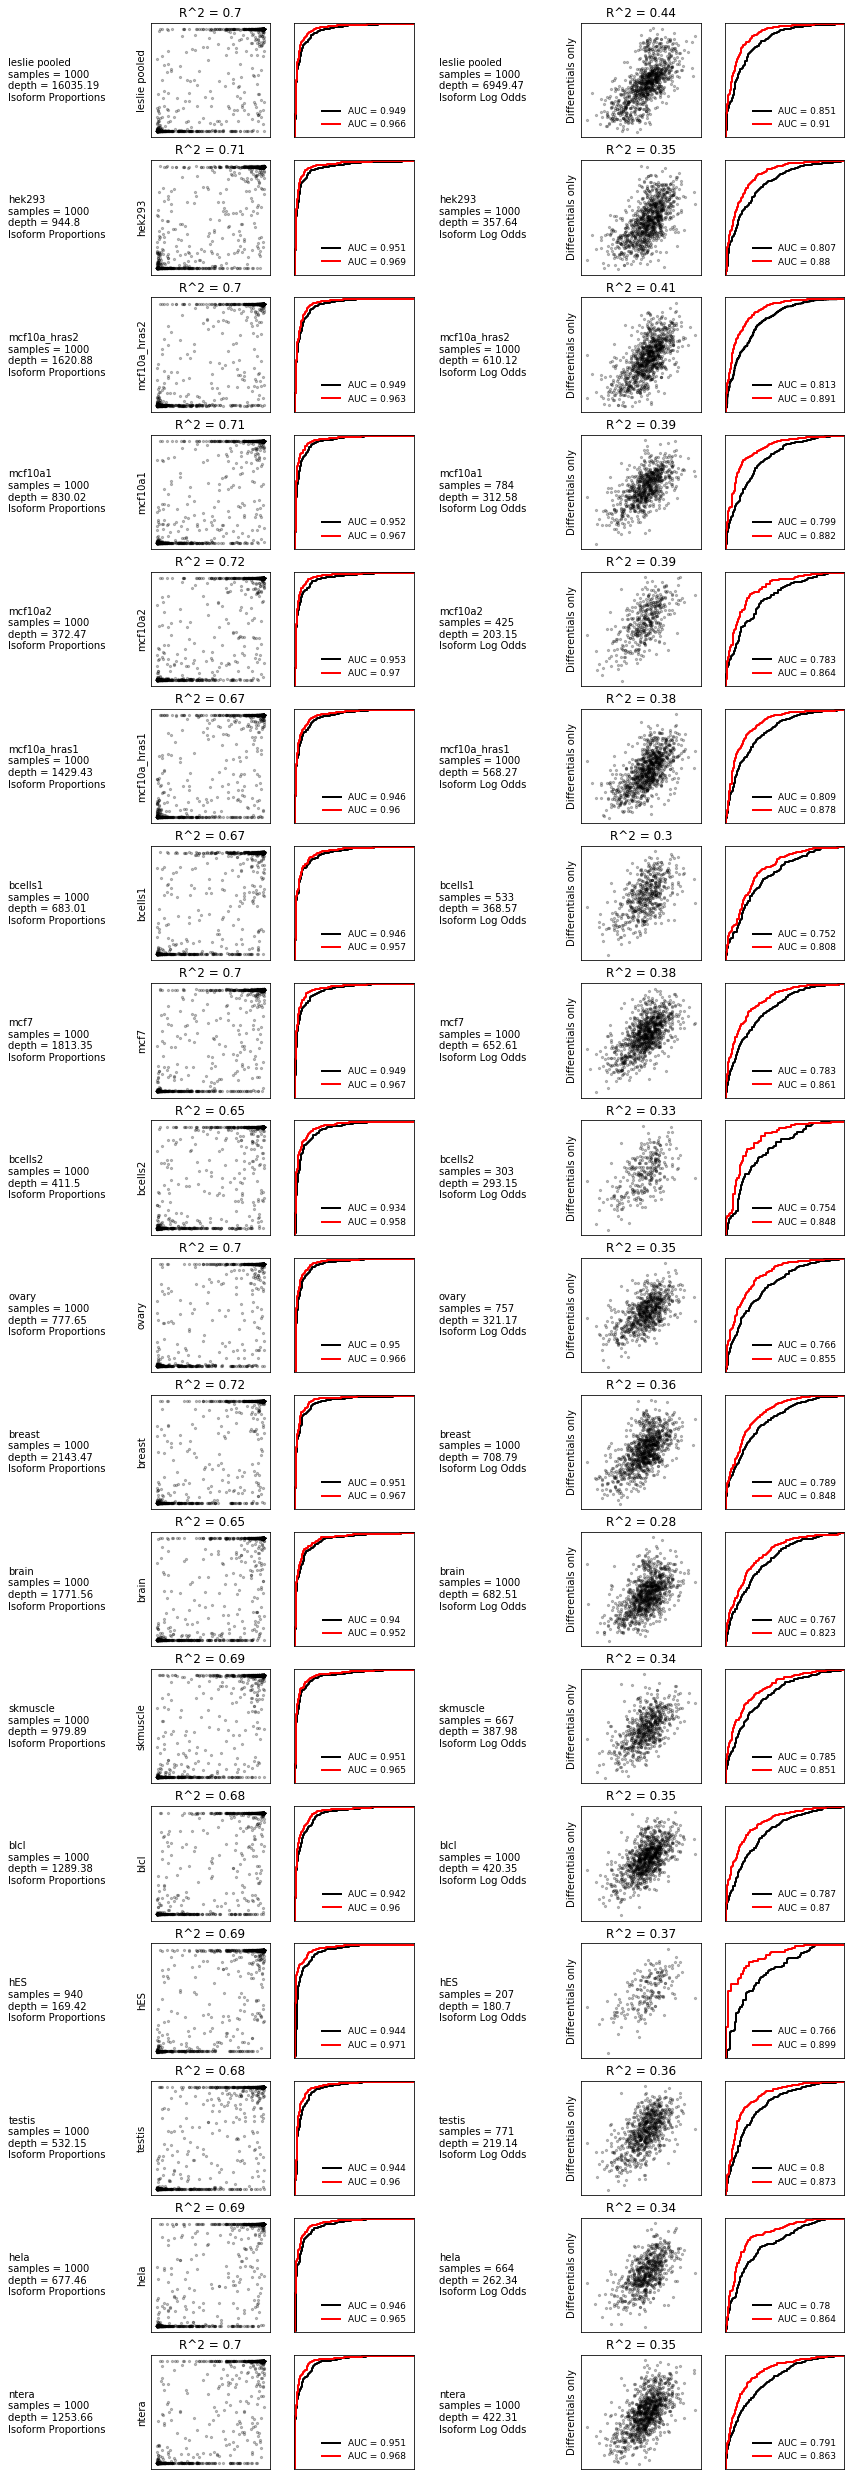

In [5]:
#Multiplex analysis of cell type-specific APA isoform prediction accuracy (Leslie)
site_nums = None
site_types = ['UTR3', 'Extension']
pseudo_count = 0.5
max_n_members = 1000

print("Leslie pair-wise APA site usage correlation (across cell types).")

[source_data, tissue_index, suffix_index] = ('leslie', ['pooled'] + leslie_tissue_index.tolist(), np.array(['_apadb_region'] * (leslie_tissue_index.shape[0] + 1), dtype=np.object))

leslie_r2_tissues, leslie_auc_tissues, leslie_n_samples_tissues, leslie_read_depth_tissues, leslie_rocs = evaluate_predicted_vs_observed_tissues(pair_df, source_data, tissue_index, suffix_index, site_nums, site_types, pseudo_count, max_n_members)


APADB Num APA Sites and Mean Read Depth.


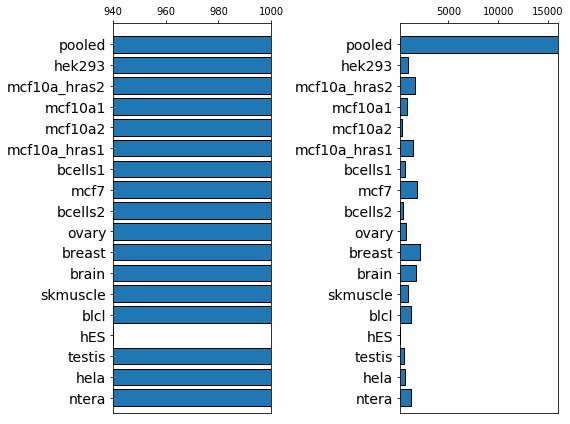

APADB Isoform Usage R^2 and Preferential Usage AUC.


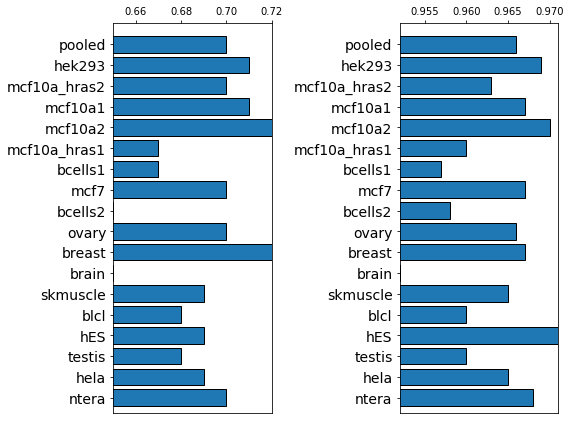

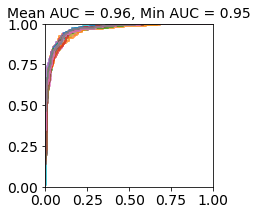

In [6]:
print('APADB Num APA Sites and Mean Read Depth.')

plot_performance_double_bar(tissue_index, leslie_n_samples_tissues, leslie_read_depth_tissues)

print('APADB Isoform Usage R^2 and Preferential Usage AUC.')

plot_performance_double_bar(tissue_index, leslie_r2_tissues, leslie_auc_tissues)

#Plot ROCs
f = plt.figure(figsize=(3, 3))
for tissue_i, tissue in enumerate(tissue_index) :
    fpr, tpr = leslie_rocs[tissue_i]
    plt.plot(fpr, tpr, linewidth=2, alpha=0.75)

min_auc = np.min(leslie_auc_tissues)
mean_auc = np.mean(leslie_auc_tissues)
plt.title('Mean AUC = ' + str(round(mean_auc, 2)) + ', Min AUC = ' + str(round(min_auc, 2)), fontsize=14)

plt.xlim(0, 1)
plt.ylim(0, 1)
plt.xticks([0, 0.25, 0.5, 0.75, 1.0], fontsize=14)
plt.yticks([0, 0.25, 0.5, 0.75, 1.0], fontsize=14)

plt.show()